        Date  Max Altitude (ft)  Max Speed (mph)  Flight Time (min)  \
0 2024-01-01         152.669375        12.178290          16.438302   
1 2024-01-04         219.799826        30.713629          17.958409   
2 2024-01-06         193.387615        15.516264           7.430771   
3 2024-01-07         172.512993        27.995467           8.592404   
4 2024-01-08         202.734050        24.159646          12.677992   

   Distance (mi)  Battery Temp (°F)  
0       0.851654          99.511273  
1       0.555216          84.940410  
2       1.739882         100.094435  
3       1.068153          94.749404  
4       1.020789          82.353313  


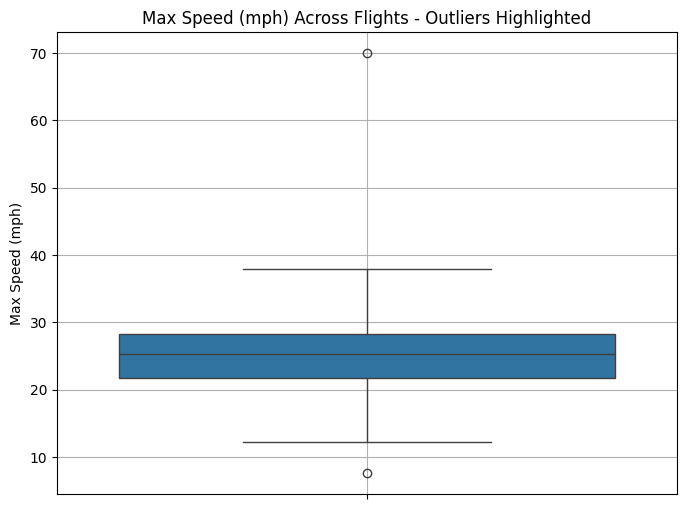

In [1]:
#Day 7-Outliers - 30daychartchallenge 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Generate 150 realistic dates in 2024
np.random.seed(42)
start_date = datetime(2024, 1, 1)
dates = [start_date + timedelta(days=int(x)) for x in np.sort(np.random.choice(range(365), 150, replace=False))]

# Generate mock flight data
data = pd.DataFrame({
    "Date": dates,
    "Max Altitude (ft)": np.random.normal(loc=200, scale=40, size=150),
    "Max Speed (mph)": np.random.normal(loc=25, scale=5, size=150),
    "Flight Time (min)": np.random.normal(loc=12, scale=3, size=150),
    "Distance (mi)": np.random.normal(loc=1.2, scale=0.4, size=150),
    "Battery Temp (°F)": np.random.normal(loc=95, scale=5, size=150)
})

# Introduce some outliers
outlier_indices = np.random.choice(data.index, 5, replace=False)
data.loc[outlier_indices[0], "Max Altitude (ft)"] = 600  # Very high altitude
data.loc[outlier_indices[1], "Max Speed (mph)"] = 70     # Speed demon
data.loc[outlier_indices[2], "Flight Time (min)"] = 40   # Long flight
data.loc[outlier_indices[3], "Distance (mi)"] = 5         # Very far flight
data.loc[outlier_indices[4], "Battery Temp (°F)"] = 130   # Overheating

# Save to CSV
data.to_csv("mock_drone_flights_2024.csv", index=False)

# Read and preview
df = pd.read_csv("mock_drone_flights_2024.csv", parse_dates=["Date"])
print(df.head())

# Plot example: Boxplot to visualize outliers in Max Speed
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["Max Speed (mph)"])
plt.title("Max Speed (mph) Across Flights - Outliers Highlighted")
plt.grid(True)
plt.show()


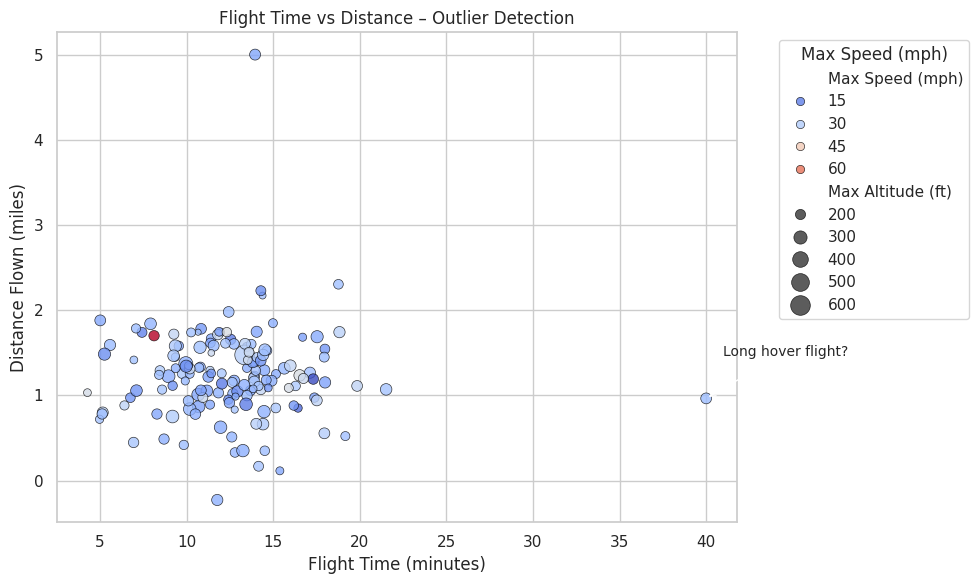

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot aesthetics
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(
    x="Flight Time (min)",
    y="Distance (mi)",
    data=df,
    hue="Max Speed (mph)",
    palette="coolwarm",
    size="Max Altitude (ft)",
    sizes=(20, 200),
    alpha=0.8,
    edgecolor="black"
)

# Annotate one or two most extreme points
outlier = df[df["Flight Time (min)"] > 35].iloc[0]
plt.annotate(
    "Long hover flight?",
    xy=(outlier["Flight Time (min)"], outlier["Distance (mi)"]),
    xytext=(outlier["Flight Time (min)"] + 1, outlier["Distance (mi)"] + 0.5),
    arrowprops=dict(facecolor='red', arrowstyle="->"),
    fontsize=10
)


plt.title("Flight Time vs Distance – Outlier Detection")
plt.xlabel("Flight Time (minutes)")
plt.ylabel("Distance Flown (miles)")
plt.legend(title="Max Speed (mph)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


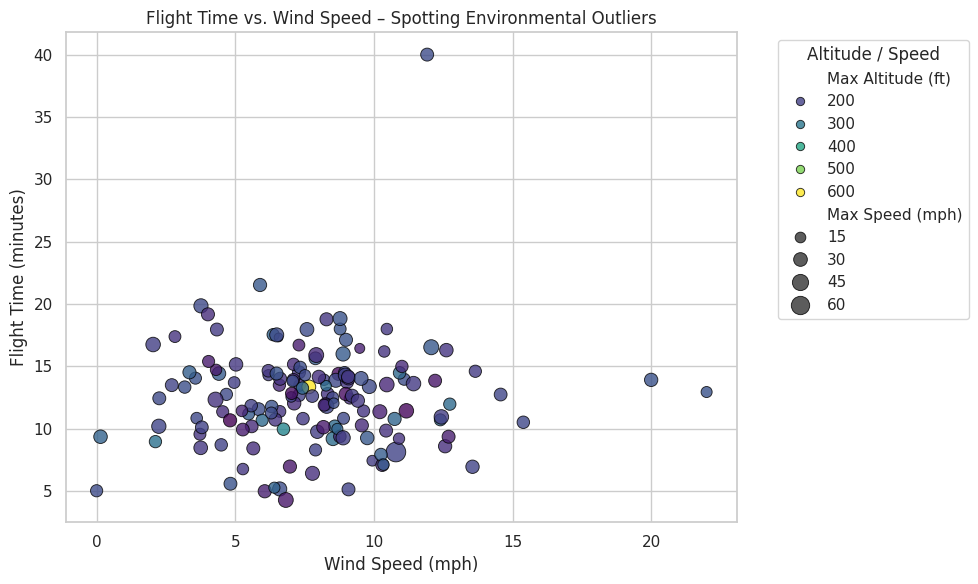

In [7]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(
    x="Wind Speed (mph)",
    y="Flight Time (min)",
    data=data,
    hue="Max Altitude (ft)",
    size="Max Speed (mph)",
    palette="viridis",
    sizes=(40, 200),
    alpha=0.8,
    edgecolor="black"
)

plt.title("Flight Time vs. Wind Speed – Spotting Environmental Outliers")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Flight Time (minutes)")
plt.legend(title="Altitude / Speed", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
